In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/AABA_2006-01-01_to_2018-01-01.csv')
data.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
1,2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2,2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
3,2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
4,2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3019 non-null   object 
 1   Open    3019 non-null   float64
 2   High    3019 non-null   float64
 3   Low     3019 non-null   float64
 4   Close   3019 non-null   float64
 5   Volume  3019 non-null   int64  
 6   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 165.2+ KB


In [4]:
data.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,28.426479,28.766532,28.066558,28.412726,2.158391e+07
std,13.257242,13.356692,13.157326,13.258163,1.926231e+07
min,9.100000,9.480000,8.940000,8.950000,1.939061e+06
25%,16.175000,16.385000,15.970000,16.130000,1.248025e+07
50%,27.180000,27.490000,26.820000,27.100000,1.732130e+07
75%,36.655000,37.035000,36.305000,36.635000,2.512757e+07
max,73.020000,73.250000,72.460000,72.930000,4.382317e+08


In [5]:
data = data[['Open']]
data.head()

,Open
0,39.69
1,41.22
2,40.93
3,42.88
4,43.10


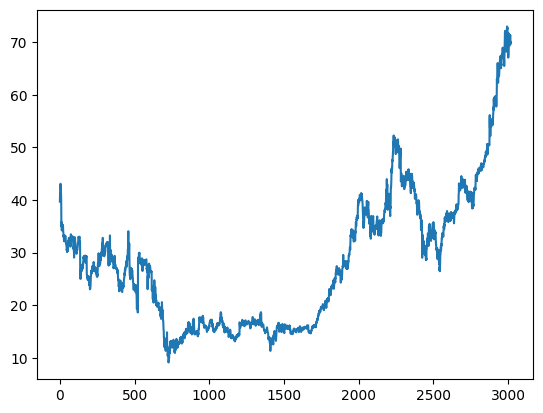

In [6]:
plt.plot(data['Open'])

In [7]:
X = data['Open'].values

In [8]:
X[:10]

array([39.69, 41.22, 40.93, 42.88, 43.1 , 42.96, 42.19, 41.92, 41.  ,
       39.09])

In [9]:
# [
#     [0.        , 0.00999983, 0.01999867] -> [0.0299955],
#     [0.00999983, 0.01999867, 0.0299955] -> [0.03998933],
#     [0.01999867, 0.0299955 , 0.03998933] -> [0.04997917]
#     ...
# ]

In [10]:
X_train, X_test = X[:2500], X[2500:]

In [11]:
model = Sequential()
model.add(SimpleRNN(units=64, activation='tanh'))
model.add(Dense(1))

In [12]:
model.compile(loss='mean_absolute_error', optimizer='adam')

In [13]:
seq_length = 30
num_samples = len(X_train) - seq_length

# ساخت X (sequence ها)
XT = np.array([X_train[i:i+seq_length] for i in range(num_samples)])

# ساخت y (مقادیر بعدی)
yT = X_train[seq_length:]


In [14]:
XT

array([[39.69, 41.22, 40.93, ..., 32.58, 32.21, 32.14],
       [41.22, 40.93, 42.88, ..., 32.21, 32.14, 32.62],
       [40.93, 42.88, 43.1 , ..., 32.14, 32.62, 33.3 ],
       ...,
       [31.26, 32.65, 33.13, ..., 33.87, 35.  , 35.59],
       [32.65, 33.13, 34.97, ..., 35.  , 35.59, 34.34],
       [33.13, 34.97, 34.3 , ..., 35.59, 34.34, 34.76]], shape=(2470, 30))

In [15]:
XT.shape

(2470, 30)

In [16]:
seq_length = 30
num_samples = len(X_test) - seq_length

# ساخت X (sequence ها)
Xt = np.array([X_test[i:i+seq_length] for i in range(num_samples)])

# ساخت y (مقادیر بعدی)
yt = X_test[seq_length:]


In [17]:
XT[1]

array([41.22, 40.93, 42.88, 43.1 , 42.96, 42.19, 41.92, 41.  , 39.09,
       35.01, 35.82, 34.44, 34.22, 34.55, 35.43, 34.94, 35.26, 35.06,
       35.2 , 34.45, 35.01, 34.  , 33.9 , 33.01, 33.24, 33.01, 32.58,
       32.21, 32.14, 32.62])

In [18]:
yT[1]

np.float64(33.3)

In [19]:
XT = np.reshape(XT, (XT.shape[0], XT.shape[1], 1))
Xt = np.reshape(Xt, (Xt.shape[0], Xt.shape[1], 1))

In [20]:
XT.shape

(2470, 30, 1)

In [21]:
XT[1]

array([[41.22],
       [40.93],
       [42.88],
       [43.1 ],
       [42.96],
       [42.19],
       [41.92],
       [41.  ],
       [39.09],
       [35.01],
       [35.82],
       [34.44],
       [34.22],
       [34.55],
       [35.43],
       [34.94],
       [35.26],
       [35.06],
       [35.2 ],
       [34.45],
       [35.01],
       [34.  ],
       [33.9 ],
       [33.01],
       [33.24],
       [33.01],
       [32.58],
       [32.21],
       [32.14],
       [32.62]])

In [22]:
yT = np.array(yT)
yt = np.array(yt)

In [23]:
history = model.fit(XT, yT, epochs=100, batch_size=20)

Epoch 1/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15.6603
Epoch 2/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.4834
Epoch 3/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3052
Epoch 4/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1080
Epoch 5/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0595
Epoch 6/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4943
Epoch 7/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1601
Epoch 8/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9705
Epoch 9/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8136
Epoch 10/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7218
Epoch 11/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6684
Epoch 12/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6046
Epoch 13/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5636
Epoch 14/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5522
Epoch 15/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 

In [24]:
model.evaluate(Xt, yt)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.0332  


4.033191680908203

In [25]:
XTPredicted = model.predict(XT)
XtPredicted = model.predict(Xt)
XFinal = np.concatenate([XTPredicted, XtPredicted], axis=0)

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


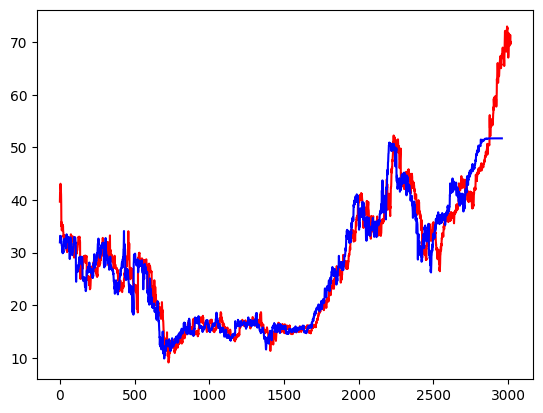

In [26]:
plt.plot(X, color='red')
plt.plot(XFinal, color='blue')